# Lightcurve (+ Transit) Creation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lightcurveenhanced as lce

In [ ]:
transits = lce.LightCurveTheoretical(ticksinper = 100, depth = .10, duration = .3, numper = 1)

In [ ]:
while transits.per < transits.numper:
    transits.plot_transit()
    transits.new_transit()


In [ ]:
import astropy.units as u

In [ ]:
class Exoplanet(object):

    def __init__(self, rad, a, rad_unit = "R_J", a_unit = "AU"):
        
        if rad_unit == "R_J":
            self.radius = rad * u.R_jup
        elif rad_unit == "R_earth":
            self.radius = rad * u.R_earth
        elif rad_unit == "m":
            self. radius == rad * u.m
        else: 
            raise("ValueError: rad_unit must be 'R_J', 'R_earth', or 'm'.")
        if a_unit == "AU":
            self.a = a * u.au
        elif a_unit == "m":
            self.a = a * u.m
        else:
            raise("ValueError: a_unit must be either 'AU' or 'm'.")
        #self.mass = mass * u.M_jup

class Star(object):
    
    def __init__(self, rad, rad_unit = "R_Sun"):
        self.radius = rad * u.R_sun
#        self.mass = mass * u.M_sun



In [24]:
testplanet = Exoplanet(20, .1)


In [25]:
teststar = Star(10)

In [26]:
a = float(((testplanet.radius / teststar.radius).to(''))**2)

In [27]:
a

0.04224067776740377

In [28]:
sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=1000, numper = 3)

23 30 27
False
46 53 50
False
53 60 57
False
30 37 34
False
65 72 69
False
19 26 23
False
71 78 75
False
2 95 99
True
25 32 29
False
61 68 65
False


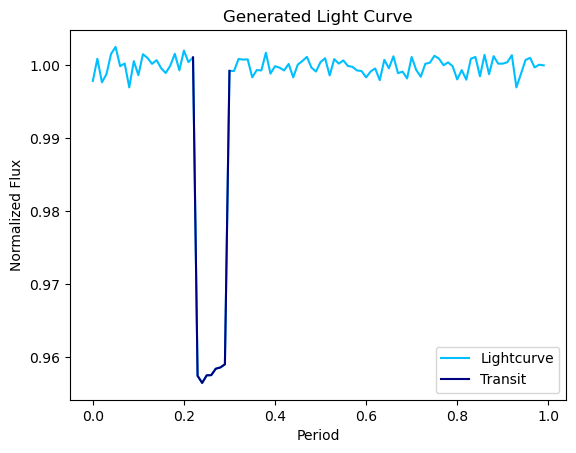

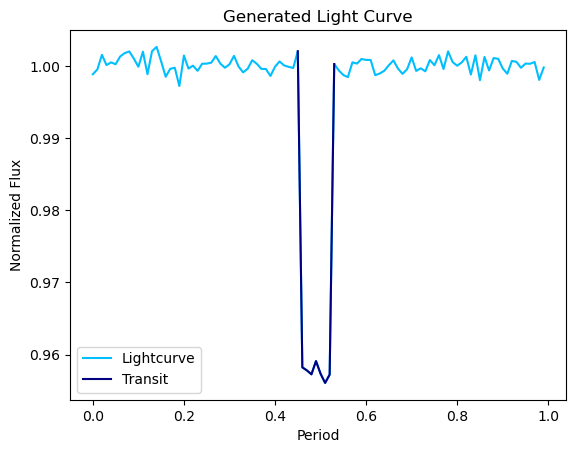

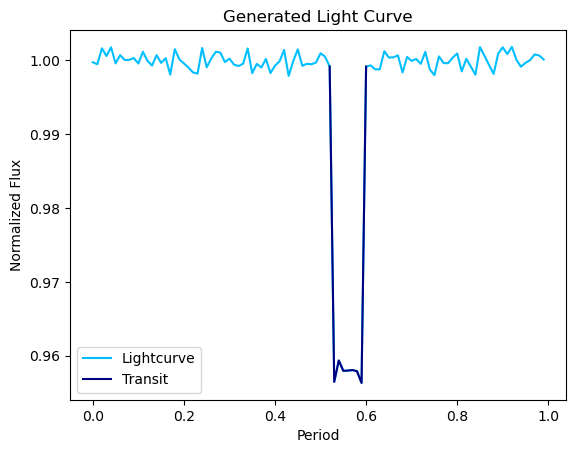

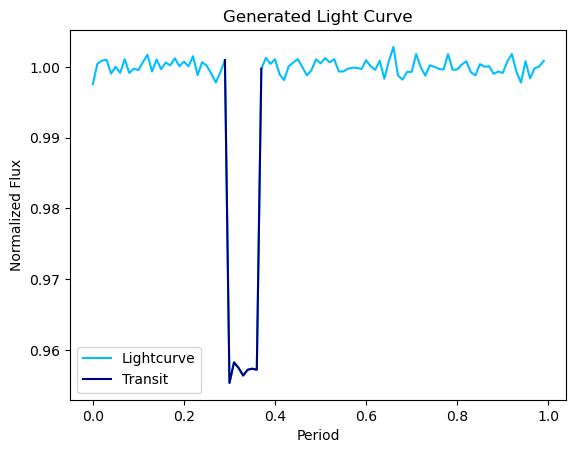

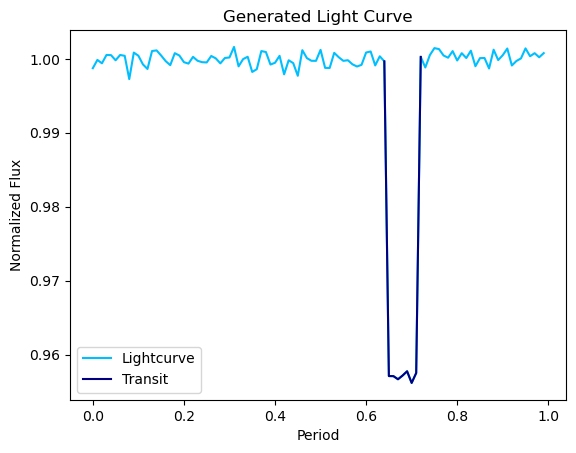

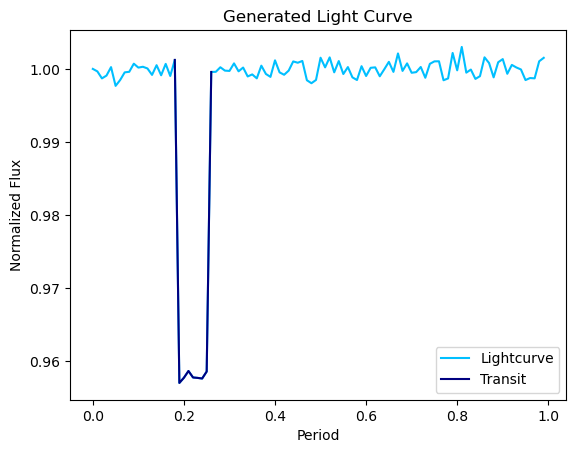

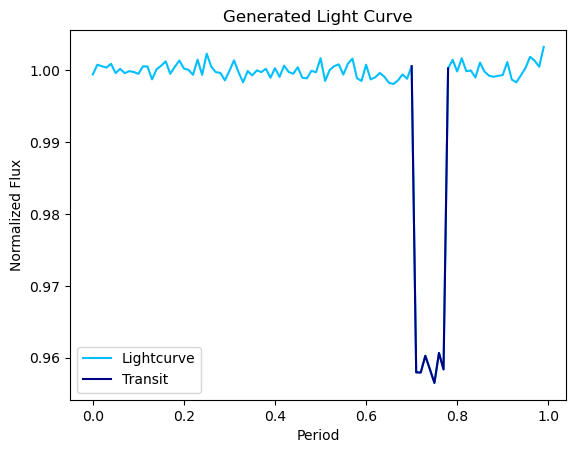

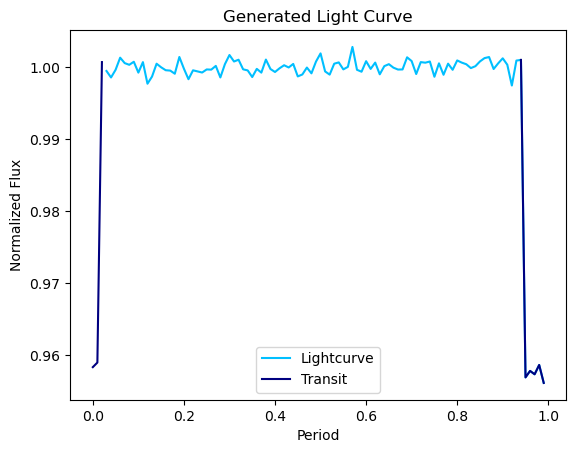

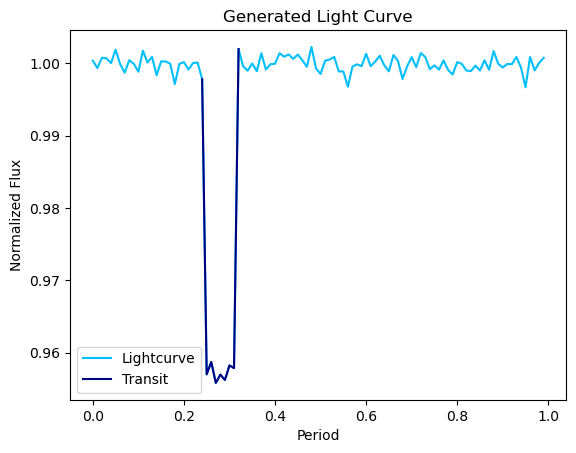

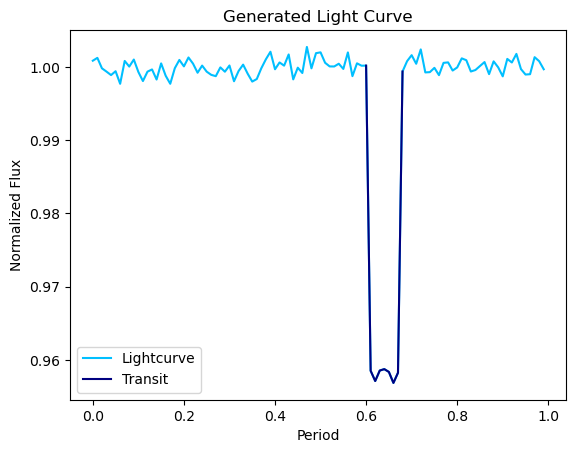

In [59]:
for i in np.arange(0,10):
        sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=100, numper = 1)
        plt.figure()
        while sunjup.per < sunjup.numper:
                sunjup.plot_transit()
                sunjup.new_transit()